# Detection and Classification of Philippines Rice Diseases Using Deep Learning
## Ramel Cary B. Jamen - 2019-2093

### Definition of the Problem

Rice diseases pose a critical challenge to Filipino agriculture and food security. These diseases can lead to reduced yield, lower quality, and total crop loss, particularly affecting farmers with limited resources who cannot afford chemical treatments or disease-resistant seeds. The high humidity and frequent rain in the Philippines create ideal conditions for disease proliferation. Our project aims to develop a deep learning classifier that can accurately detect and classify rice diseases, providing an accessible solution for early detection and intervention.



### Data Acquisition
- Source: Omdena's Local Chapter project - Creating a Rice Disease Classifier using Open Source Data and Computer Vision
- The dataset comprises high-quality images of rice plants exhibiting various disease symptoms
- Images were collected through field photography and curated from agricultural research databases
- Each image has been validated by agricultural experts to ensure accurate disease classification
- The dataset is balanced across disease categories to prevent model bias



### Dataset Characteristics

* The dataset consists of images stored in 224 x 224 pixels resolution to facilitate the training of deep learning models.
* It includes data on rice diseases affecting plants in the Philippines, a crucial agricultural crop in the region. The country's humid climate and frequent rainfall create favorable conditions for various rice diseases.

### Dataset Categorization

* The dataset contains images categorized into 13 different rice diseases, grouped under three types:
  * **Fungal**
    + Rice Blast
    + Sheath Blight
    + Brown Spot
    + Narrow Brown Spot
    + Sheath Rot
    + Stem Rot
    + Bakanae
    + Rice False Smut
  * **Bacterial**
    + Bacterial Leaf Blight
    + Bacterial Leaf Streak
  * **Viral**
    + Tungro Virus
    + Ragged Stunt Virus
    + Grassy Stunt Virus

## Technical Implementation

### Prerequisites
- Python 3.x
- TensorFlow
- NumPy
- Matplotlib
- scikit-learn

### Installation

Clone the repository and change directory:
```
git clone https://github.com/RCJamen/rice-classification.git
cd rice-classification
```

Create virtual environment and activate it:
```
python -m venv .venv
source .venv/bin/activate
```

Install dependencies:
```
pip install -r requirements.txt
```



# Code Implementation

### Library Imports for Rice Disease Classification Model

#### Core Libraries
- `os`: Handles operating system operations and file path manipulations
- `numpy` (as `np`): Provides support for large, multi-dimensional arrays and mathematical operations

#### Visualization
- `matplotlib.pyplot` (as `plt`): Creates plots and visualizations for model analysis and results

#### Deep Learning Framework (TensorFlow/Keras)
- `VGG16`: Pre-trained convolutional neural network model for transfer learning
- `Sequential`: Keras model type for linear stack of layers
- `Dense, Dropout, Flatten`: Core layers for building the neural network
  - `Dense`: Fully connected neural network layer
  - `Dropout`: Regularization layer to prevent overfitting
  - `Flatten`: Converts multi-dimensional input to 1D array

#### Data Processing
- `ImageDataGenerator`: Keras utility for real-time data augmentation and preprocessing
- `Adam`: Optimization algorithm for training the neural network

#### Model Training Utilities
- `EarlyStopping`: Callback to stop training when model stops improving
- `ReduceLROnPlateau`: Callback to reduce learning rate when metrics plateau
- `ModelCheckpoint`: Callback to save model weights during training

#### Evaluation Metrics
- `accuracy_score`: Calculates the accuracy of model predictions
- `precision_score`: Calculates precision metric
- `recall_score`: Calculates recall metric
- `f1_score`: Calculates F1 score (harmonic mean of precision and recall)

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import precision_score, recall_score, f1_score

2024-12-04 22:19:09.899564: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-04 22:19:09.905006: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-04 22:19:09.919745: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733321949.944207   19306 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733321949.951237   19306 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-04 22:19:09.976348: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

### Dataset Preparation and Analysis

#### 1. Dataset Split
Our dataset is divided into two parts:
- Training Set (80% of data)
- Validation Set (20% of data)

#### 2. Image Preprocessing
Each image is processed in the following way:
- Resized to 224 x 224 pixels
- Pixel values normalized (divided by 255 to get values between 0 and 1)

#### 3. Data Augmentation
To prevent overfitting and increase our dataset size, we apply these random transformations:
- Rotation: up to 20 degrees
- Width shift: up to 20%
- Height shift: up to 20%
- Shear transformation: up to 20%
- Zoom: up to 20%
- Horizontal flip: randomly flip images
- Fill mode: 'nearest' (for any new pixels created)

In [30]:
dataset_dir = 'dataset'
IMG_WIDTH, IMG_HEIGHT = 224, 224

# Create an ImageDataGenerator with data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

test_datagen = train_datagen

# Load all the images from the dataset directory
train_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = test_datagen.flow_from_directory(
    dataset_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 1247 images belonging to 14 classes.
Found 308 images belonging to 14 classes.


#### 4. Data Visualization
We created a function to visualize our dataset:
- Shows 18 images at once (3 rows × 6 columns)
- Displays the class label for each image
- Helps verify data loading and augmentation

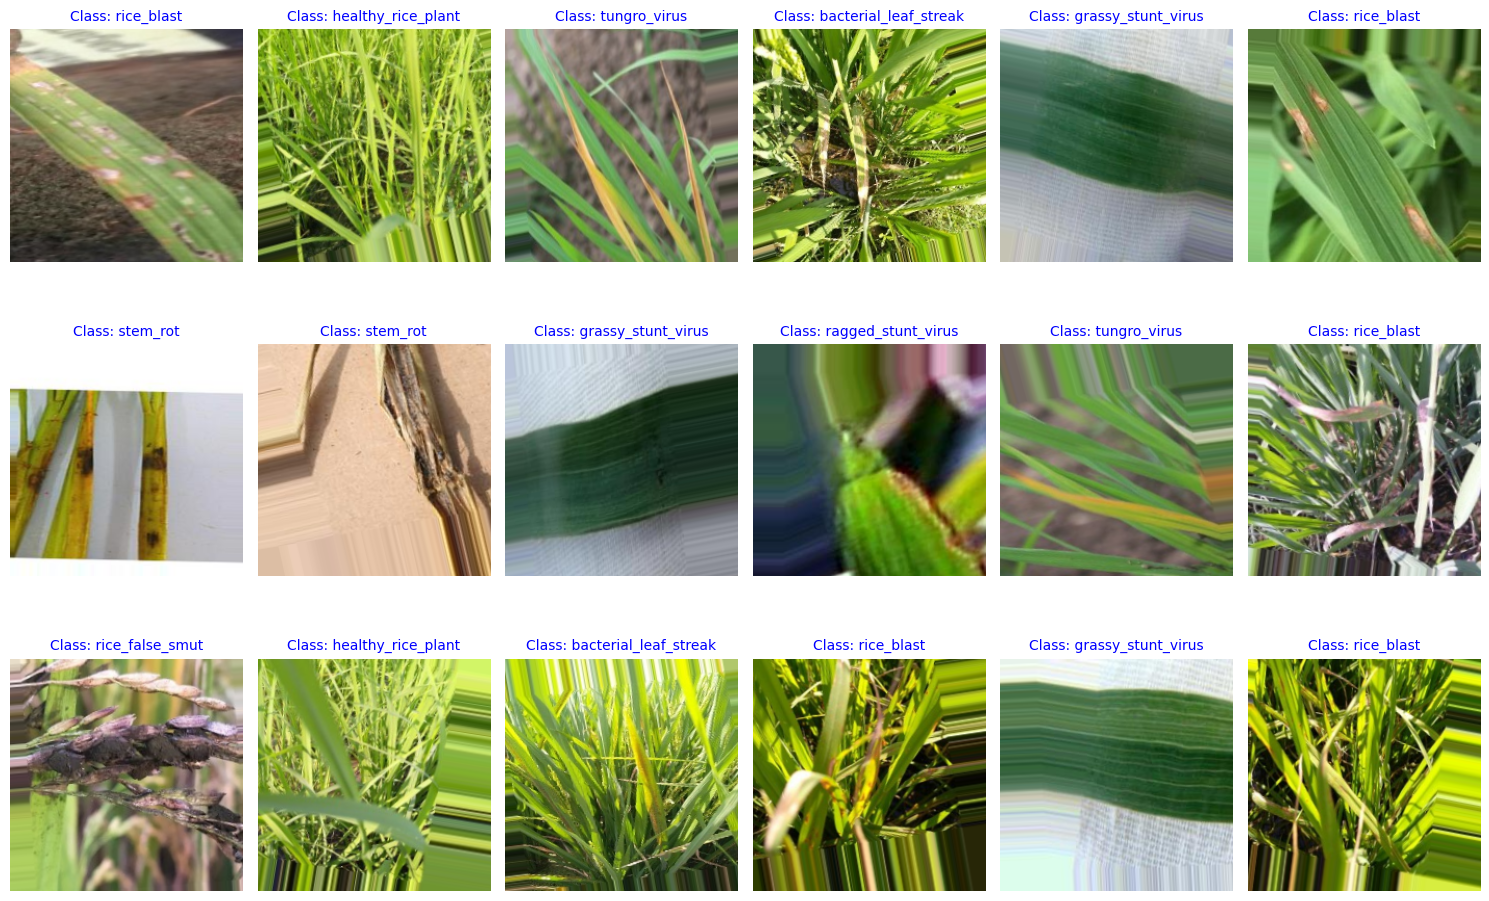

In [18]:
def show_images(generator, class_labels, num_images=18):
    fig, axes = plt.subplots(3, 6, figsize=(15, 10))
    axes = axes.ravel()

    images, labels = next(generator)  # get a batch of images

    for i in range(num_images):
        axes[i].imshow(images[i])
        class_idx = np.argmax(labels[i])
        axes[i].set_title(f'Class: {class_labels[class_idx]}', color='blue', fontsize=10)
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

# Visualize some images from the dataset
class_labels = list(train_generator.class_indices.keys())
show_images(train_generator, class_labels)

#### 5. Dataset Statistics
In this section, we analyze and visualize key statistics about our dataset:
- Total number of classes and their names
- Number of samples in training and validation sets
- Distribution of images across different disease classes
- Basic image statistics like dimensions and pixel value ranges
- Visual representation of class distribution through a bar plot

This helps us understand:
- If our dataset is balanced
- The scale and scope of our classification task
- The characteristics of our input images



Dataset Statistics:
Total number of classes: 14
Class names: ['bacterial_leaf_blight', 'bacterial_leaf_streak', 'bakanae', 'brown_spot', 'grassy_stunt_virus', 'healthy_rice_plant', 'narrow_brown_spot', 'ragged_stunt_virus', 'rice_blast', 'rice_false_smut', 'sheath_blight', 'sheath_rot', 'stem_rot', 'tungro_virus']

Training set:
Number of training samples: 1247
Steps per epoch: 38
Class distribution:
- bacterial_leaf_blight: 140 images
- bacterial_leaf_streak: 99 images
- bakanae: 100 images
- brown_spot: 150 images
- grassy_stunt_virus: 100 images
- healthy_rice_plant: 140 images
- narrow_brown_spot: 98 images
- ragged_stunt_virus: 100 images
- rice_blast: 140 images
- rice_false_smut: 99 images
- sheath_blight: 98 images
- sheath_rot: 91 images
- stem_rot: 100 images
- tungro_virus: 100 images

Validation set:
Number of validation samples: 308
Validation steps: 9


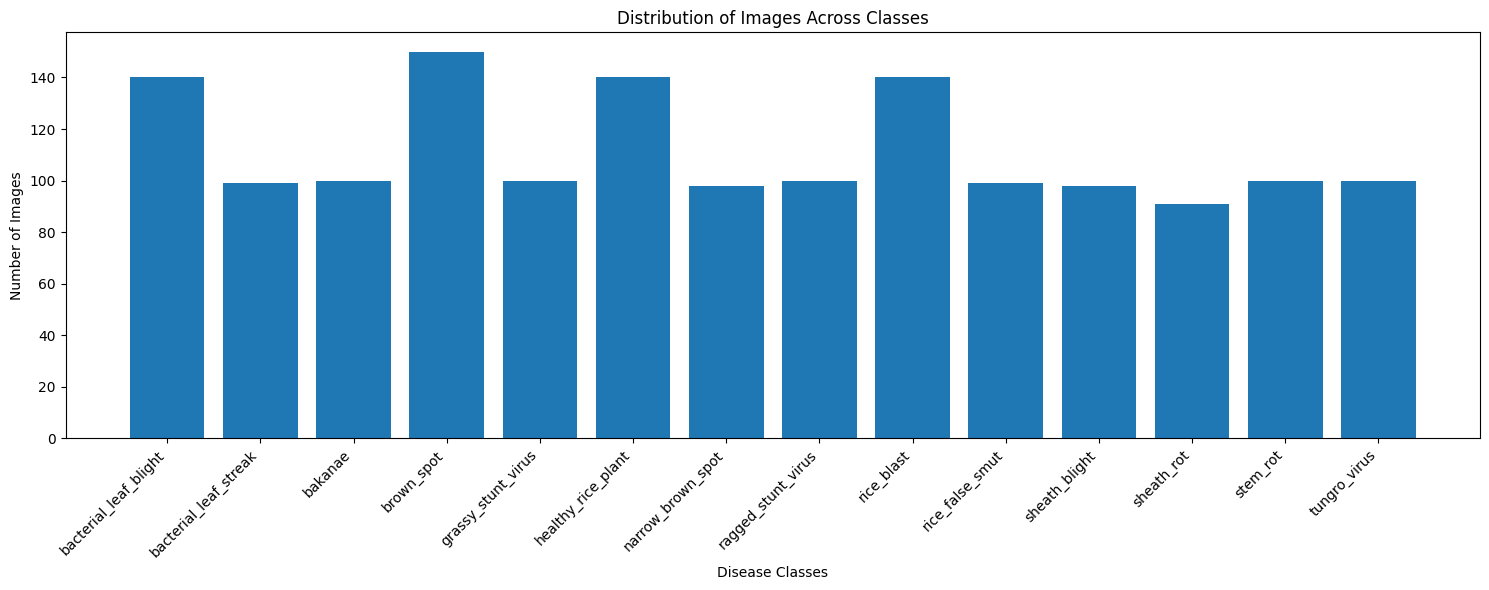


Image Statistics:
Image dimensions: (224, 224, 3)
Pixel value range: [0.000, 1.000]
Mean pixel value: 0.494
Std pixel value: 0.298


In [31]:
# After creating the generators, add these lines to get dataset statistics
print("\nDataset Statistics:")
print(f"Total number of classes: {len(train_generator.class_indices)}")
print(f"Class names: {list(train_generator.class_indices.keys())}")
print("\nTraining set:")
print(f"Number of training samples: {train_generator.samples}")
print(f"Steps per epoch: {train_generator.n // train_generator.batch_size}")
print(f"Class distribution:")
for class_name, class_idx in train_generator.class_indices.items():
    class_count = len(os.listdir(os.path.join(dataset_dir, class_name)))
    print(f"- {class_name}: {class_count} images")

print("\nValidation set:")
print(f"Number of validation samples: {validation_generator.samples}")
print(f"Validation steps: {validation_generator.n // validation_generator.batch_size}")

# Create a bar plot of class distribution
plt.figure(figsize=(15, 6))
class_counts = [len(os.listdir(os.path.join(dataset_dir, class_name)))
                for class_name in train_generator.class_indices.keys()]
plt.bar(train_generator.class_indices.keys(), class_counts)
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Images Across Classes')
plt.xlabel('Disease Classes')
plt.ylabel('Number of Images')
plt.tight_layout()
plt.show()

# Calculate and display image statistics
print("\nImage Statistics:")
sample_batch = next(train_generator)[0]  # Get a batch of images
print(f"Image dimensions: {sample_batch[0].shape}")
print(f"Pixel value range: [{sample_batch.min():.3f}, {sample_batch.max():.3f}]")
print(f"Mean pixel value: {sample_batch.mean():.3f}")
print(f"Std pixel value: {sample_batch.std():.3f}")

### Create Model Structure



The model architecture consists of the following layers:

1. Base Model: VGG16
    - Pre-trained on ImageNet dataset
    - Weights are frozen (non-trainable) to preserve learned features
   - Top layers removed to allow customization
   - Input shape: (IMG_HEIGHT, IMG_WIDTH, 3) for RGB images
2. Flatten Layer
   - Converts 3D feature maps to 1D vector
   - Prepares data for dense layers
3. Dense Layer (512 units)
   - Fully connected layer with 512 neurons
   - ReLU activation for non-linearity
   - Learns high-level feature combinations
4. Dropout Layer (0.5)
   - Randomly deactivates 50% of neurons during training
   - Prevents overfitting by reducing co-adaptation
5. Output Layer
   - 14 units for 14 rice disease classes
   - Softmax activation for multi-class probability distribution
The model is compiled with:
- Adam optimizer (learning rate: 0.0001)
- Categorical crossentropy loss for multi-class classification
- Accuracy metric for performance monitoring


In [19]:
model = Sequential()
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))
for layer in base_model.layers:
    layer.trainable = False
model.add(base_model)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(14, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

2024-12-04 22:24:38.184987: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2024-12-04 22:24:38.523193: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 51380224 exceeds 10% of free system memory.
2024-12-04 22:24:38.539324: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 51380224 exceeds 10% of free system memory.
2024-12-04 22:24:38.553484: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 51380224 exceeds 10% of free system memory.


### Define callback functions


1. EarlyStopping
   - Monitors validation loss
   - Stops training if no improvement after 10 epochs
   - Helps prevent overfitting
2. ReduceLROnPlateau
   - Monitors validation loss
   - Reduces learning rate by factor of 0.1 if no improvement after 5 epochs
   - Minimum learning rate: 0.00001
3. ModelCheckpoint
   - Saves best model based on validation accuracy
   - Only saves when model improves
   - Saves to 'rice_disease_classifier.keras'


In [20]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=0.00001, verbose=1)
checkpoint = ModelCheckpoint('rice_disease_classifier.keras', monitor='val_accuracy', verbose=1, save_best_only=True)

### Train the model

- Train the model for 50 epochs with early stopping, learning rate reduction, and model checkpointing
- The model will be trained on the training data and validated on the validation data
- Early stopping will prevent overfitting by monitoring validation loss
- Learning rate will be reduced if validation loss plateaus
- Best model weights will be saved based on validation accuracy


In [21]:
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    callbacks=[early_stopping, reduce_lr, checkpoint]
)

/home/ari/Downloads/173FinalProject/.venv/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50


2024-12-04 22:25:51.300673: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 51380224 exceeds 10% of free system memory.
2024-12-04 22:25:52.162886: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 411041792 exceeds 10% of free system memory.


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.1583 - loss: 2.6285
Epoch 1: val_accuracy improved from -inf to 0.43182, saving model to rice_disease_classifier.keras
39/39 ━━━━━━━━━━━━━━━━━━━━ 237s 6s/step - accuracy: 0.1608 - loss: 2.6202 - val_accuracy: 0.4318 - val_loss: 1.8041 - learning_rate: 1.0000e-04
Epoch 2/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.4096 - loss: 1.7643
Epoch 2: val_accuracy improved from 0.43182 to 0.50325, saving model to rice_disease_classifier.keras
39/39 ━━━━━━━━━━━━━━━━━━━━ 270s 7s/step - accuracy: 0.4099 - loss: 1.7637 - val_accuracy: 0.5032 - val_loss: 1.5920 - learning_rate: 1.0000e-04
Epoch 3/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.5048 - loss: 1.5378
Epoch 3: val_accuracy improved from 0.50325 to 0.59091, saving model to rice_disease_classifier.keras
39/39 ━━━━━━━━━━━━━━━━━━━━ 293s 8s/step - accuracy: 0.5052 - loss: 1.5368 - val_accuracy: 0.5909 - val_loss: 1.3663 - learning_rate: 1.0000e-04
Epoch 4/50
39/39 ━━━━━━━━━━

### Evaluate the model


In [22]:
loss, accuracy = model.evaluate(validation_generator)
print(f'Model accuracy: {accuracy:.2f}')

# Get predictions
y_pred = model.predict(validation_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = validation_generator.classes

# Calculate metrics
precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')
f1 = f1_score(y_true, y_pred_classes, average='weighted')

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')

10/10 ━━━━━━━━━━━━━━━━━━━━ 53s 5s/step - accuracy: 0.8046 - loss: 0.5841
Model accuracy: 0.79
10/10 ━━━━━━━━━━━━━━━━━━━━ 53s 5s/step
Precision: 0.07
Recall: 0.07
F1-score: 0.07


### Visualize some predictions


Let's visualize some example predictions from our model. We'll display 18 images from the validation set in a 3x6 grid.
For each image, we'll show:
- The original image
- The true label in green if predicted correctly
- The predicted label in red if predicted incorrectly



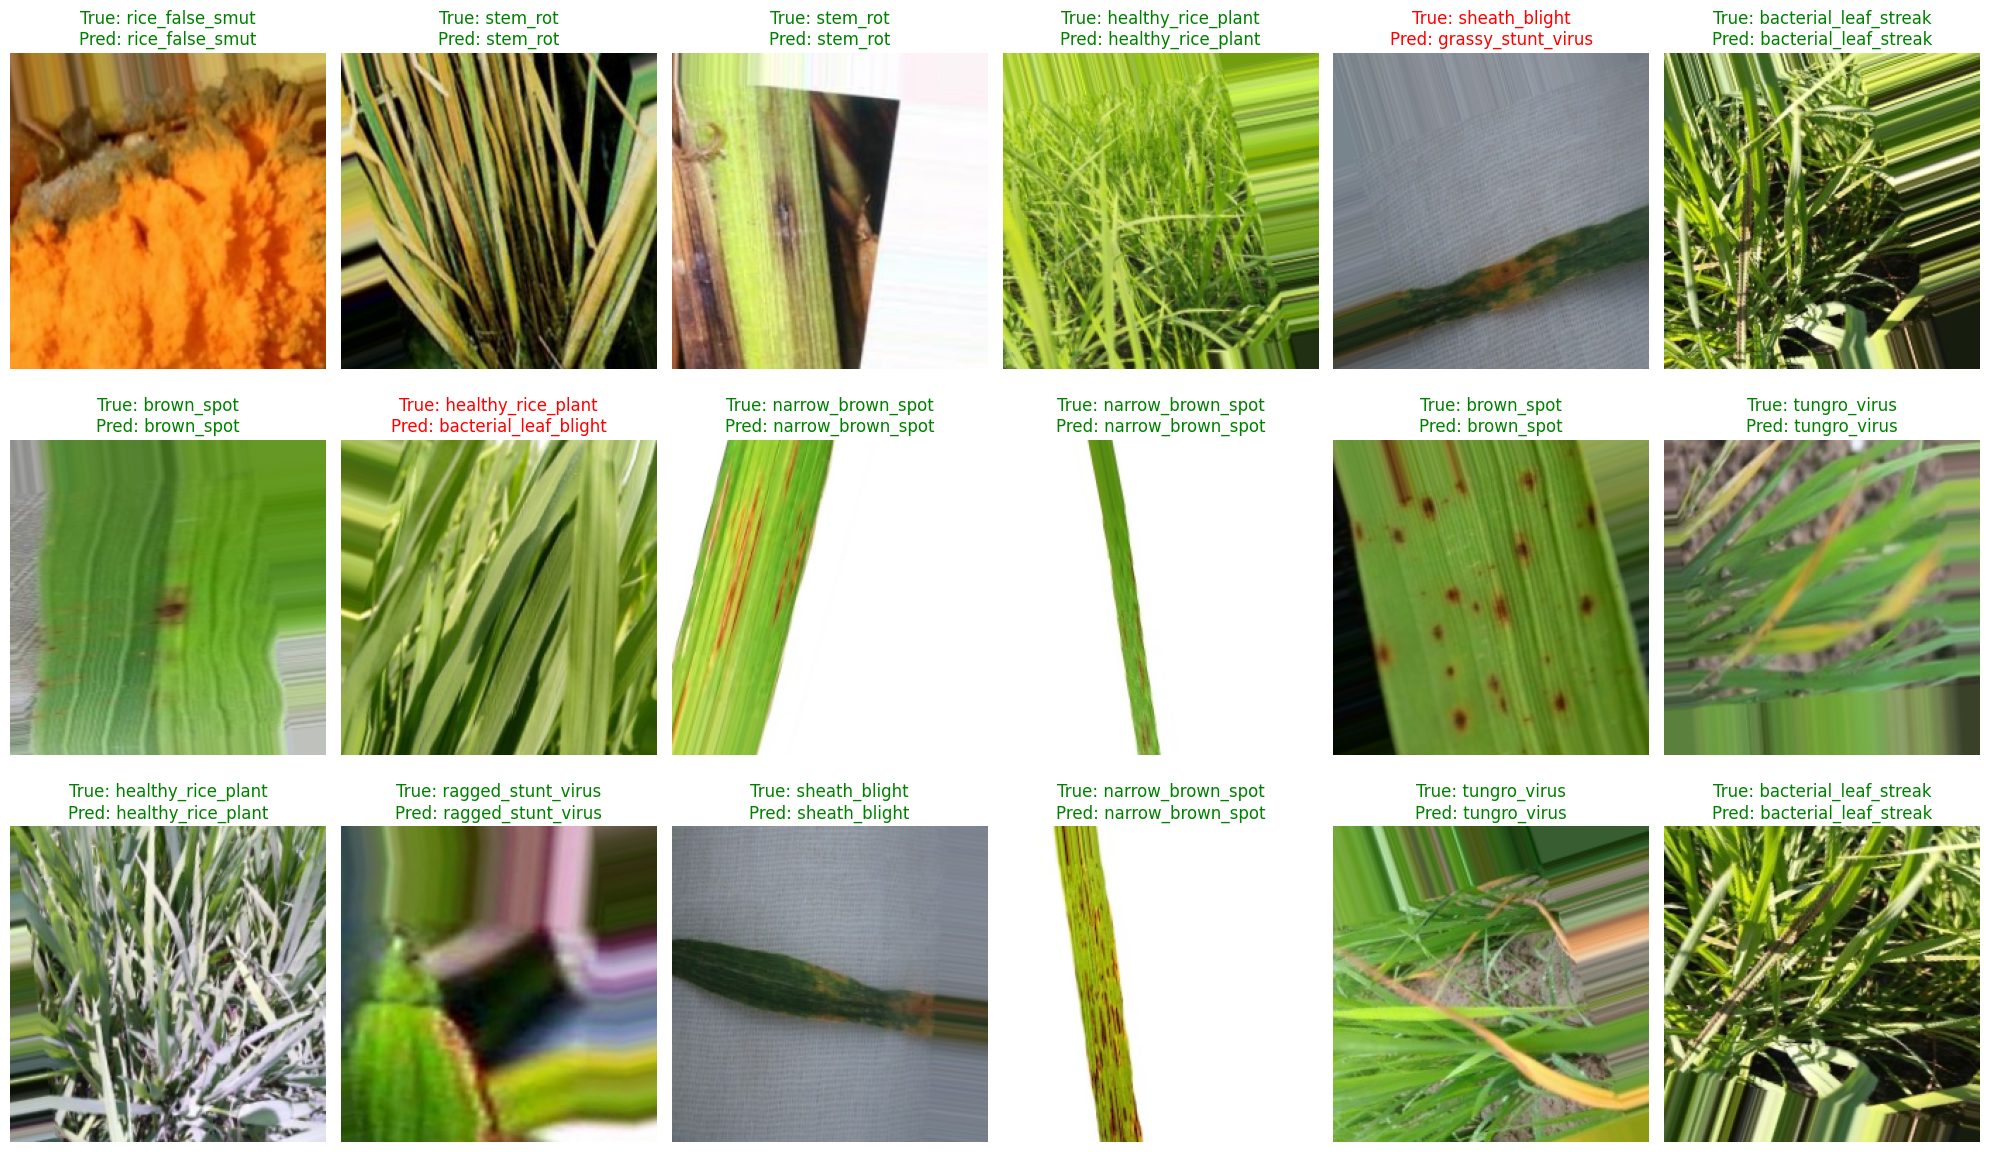

In [29]:
fig, axes = plt.subplots(3, 6, figsize=(20, 12))  # Increased figure size
axes = axes.ravel()

for i in range(18):
    # Get a single batch
    batch_x, batch_y = next(validation_generator)

    # Make prediction
    pred = model.predict(batch_x[0:1], verbose=0)
    true_class = np.argmax(batch_y[0])
    pred_class = np.argmax(pred[0])

    # Plot image and labels
    axes[i].imshow(batch_x[0])
    axes[i].set_title(f'True: {class_labels[true_class]}\nPred: {class_labels[pred_class]}',
                     color='green' if true_class == pred_class else 'red',
                     fontsize=12)
    axes[i].axis('off')

plt.tight_layout()
plt.show()